# ASSIGNMENT-4 : BIGMART DATASET


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Read Dataset

In [ ]:
data=pd.read_csv("bigmart.csv")
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Get statistics 

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6908.000000,8234.000000,8234.000000,8234.000000,8234.000000
mean,12.856780,0.066407,138.187065,1998.003036,2007.322393
std,4.646836,0.051940,61.196417,8.293892,1441.246239
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.775000,0.027043,92.512650,1987.000000,801.623200
50%,12.600000,0.053864,139.983800,1999.000000,1720.427200
75%,16.850000,0.095623,182.419350,2004.000000,2942.170200
max,21.350000,0.328391,266.888400,2009.000000,5992.200000


### 1: Return total number of rows and columns

In [ ]:
data.shape

(8234, 12)

### Print columns

In [ ]:
list(data.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [ ]:
print(data['Item_Outlet_Sales'].describe())

count    8234.000000
mean     2007.322393
std      1441.246239
min        33.290000
25%       801.623200
50%      1720.427200
75%      2942.170200
max      5992.200000
Name: Item_Outlet_Sales, dtype: float64


###  Display density Graph


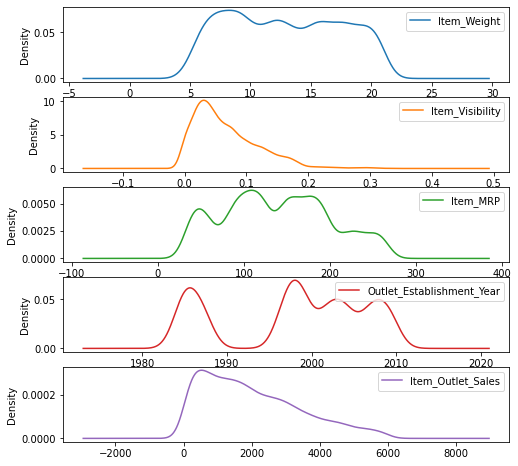

In [ ]:
data.plot(kind = "density", subplots = True, sharey = False,sharex=False, figsize = (8,8))
plt.show()

### Frequency in categories

In [ ]:
categorial_features = data.select_dtypes(include=[np.object])
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDG33    10
FDW13    10
FDD38     9
FDQ40     9
FDF52     9
         ..
FDP15     1
FDO33     1
FDQ60     1
FDE52     1
DRG25     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    4911
Regular    2789
LF          311
reg         115
low fat     108
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    1179
Snack Foods              1160
Household                 883
Frozen Foods              826
Dairy                     653
Baking Goods              634
Canned                    630
Health and Hygiene        504
Soft Drinks               431
Meat                      410
Breads                    243
Hard Drinks               206
Others                    168
Starchy Foods             142
Breakfast                 102
Seafood                    63
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT018    916
OUT045    912
OUT046    912
OUT013    906
OUT049    905
OUT035    902
OUT017

### Correlation

In [ ]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014047,0.028876,-0.014880,0.015693
Item_Visibility,-0.014047,1.000000,0.005109,-0.083835,-0.136179
Item_MRP,0.028876,0.005109,1.000000,0.027488,0.542385
Outlet_Establishment_Year,-0.014880,-0.083835,0.027488,1.000000,0.019574
Item_Outlet_Sales,0.015693,-0.136179,0.542385,0.019574,1.000000


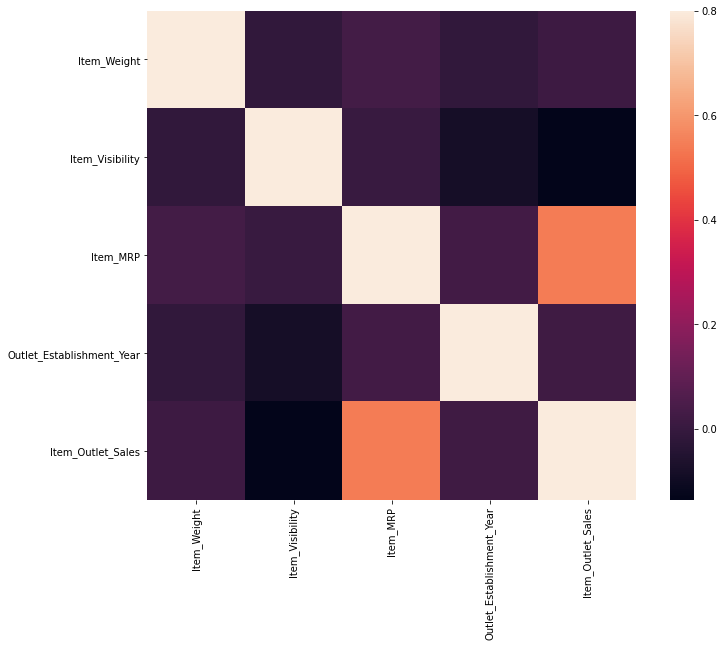

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

### Missing values

In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1326
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2367
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1555 rows x 1 columns]


In [ ]:
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [ ]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 2367
Final #missing: 0


In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data.Item_Weight.fillna(data.Item_Weight.mean(), inplace = True)
data.Outlet_Size.fillna(data.Outlet_Size.mode()[0], inplace=True)

In [ ]:
print(data.isna().sum())  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


### Feature Engineering

In [ ]:
data.Item_Fat_Content.value_counts()

Low Fat    4911
Regular    2789
LF          311
reg         115
low fat     108
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Now replace LF by Low Fat ,low fat by lf,reg by Regular
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    5330
Regular    2904
Name: Item_Fat_Content, dtype: int64

In [ ]:
data['Outlet_Years']=2018-data['Outlet_Establishment_Year']

In [ ]:
Mean_Visibility=data['Item_Visibility'].mean()
data['Item_Visibility_MeanRatio']=data.apply(lambda x:x['Item_Visibility']/Mean_Visibility,axis=1)

### Encode categorical->numerical

In [ ]:
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
number=LabelEncoder()

In [ ]:
data['Outlet']=number.fit_transform(data['Outlet_Identifier'])
data['Identifier']=number.fit_transform(data['Item_Identifier'])

In [ ]:
for i in var_mod:
      data[i]=number.fit_transform(data[i])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Visibility_MeanRatio,Outlet,Identifier
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,19,0.241652,9,156
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,9,0.290306,3,8
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,19,0.252386,9,662
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,20,0.000000,0,1121
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,31,0.000000,1,1297


### Split data into training and testing

In [ ]:
X=data[data.columns[1:]].drop(['Outlet_Identifier'],axis=1).dropna(how='all')
y=data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Using Linear Regression

In [ ]:
LR = LinearRegression(normalize=True)
predictors = data.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'])
LR.fit(X_train[predictors],y_train)

LinearRegression(normalize=True)

In [ ]:
y_pred = LR.predict(X_test[predictors])
y =y_test

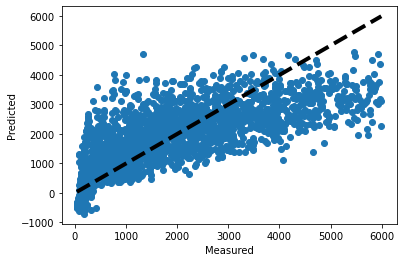

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()